In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import chisquare
from scipy.stats import mannwhitneyu
from scipy import stats as sp_stats
from scipy.stats import linregress
df_total = pd.read_csv("../data/steamspy_enriched.csv")
df_enriched=df_total

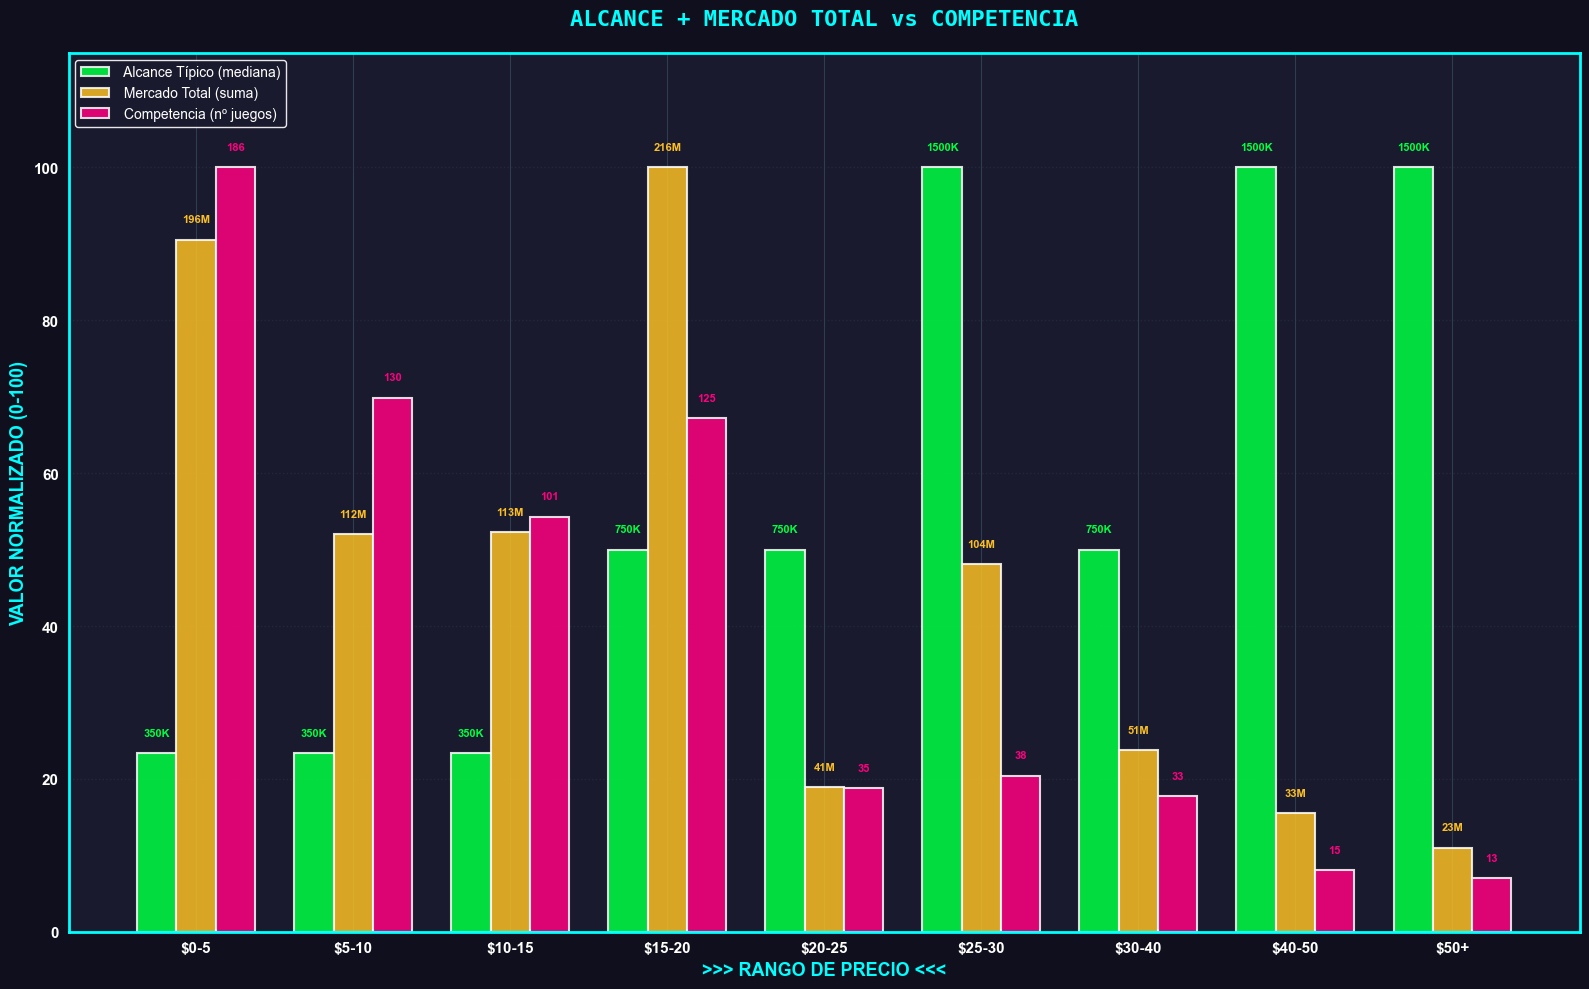

In [2]:
# Estilo gaming
plt.style.use('dark_background')
sns.set_style("darkgrid", {
    "axes.facecolor": "#1a1a2e",
    "figure.facecolor": "#0f0f1e",
    "grid.color": "#2d3e50",
    "grid.alpha": 0.3
})
COLOR_F2P = '#00ff41'
COLOR_PAID = '#ff0080'
COLOR_TEXT = '#00ffff'
COLOR_TOTAL = '#fbbf24' 

# Preparar datos
df_total['price_usd'] = df_total['price'] / 100
df_total['total_reviews'] = df_total['positive'] + df_total['negative']
df_total['positive_ratio'] = (df_total['positive'] / df_total['total_reviews']) * 100
df_scatter = df_total[
    (df_total['price_usd'] > 0) & 
    (df_total['price_usd'] <= 100) &
    (df_total['owners_median'] > 0) &
    (df_total['total_reviews'] >= 10)
].copy()

# Crear rangos de precio
bins = [0, 5, 10, 15, 20, 25, 30, 40, 50, 100]
labels = ['$0-5', '$5-10', '$10-15', '$15-20', '$20-25', '$25-30', '$30-40', '$40-50', '$50+']
df_scatter['price_range'] = pd.cut(df_scatter['price_usd'], bins=bins, labels=labels)

# Calcular métricas por rango
summary = df_scatter.groupby('price_range', observed=True).agg({
    'owners_median': ['median', 'sum'],
    'positive_ratio': 'mean',
    'name': 'count'
}).reset_index()
summary.columns = ['Rango', 'Owners_Mediana', 'Owners_Total', 'Calidad_Promedio', 'Num_Juegos']

# Gráfico
fig, ax = plt.subplots(figsize=(16, 10))
x = np.arange(len(summary))
width = 0.25

# Normalizar las 3 métricas para comparar en la misma escala (0-100)
owners_median_norm = (summary['Owners_Mediana'] / summary['Owners_Mediana'].max()) * 100
owners_total_norm = (summary['Owners_Total'] / summary['Owners_Total'].max()) * 100
games_norm = (summary['Num_Juegos'] / summary['Num_Juegos'].max()) * 100

# Crear las 3 barras
bars1 = ax.bar(x - width, owners_median_norm, width, 
              label=' Alcance Típico (mediana)',
              color=COLOR_F2P, edgecolor='white', linewidth=1.5, alpha=0.85)

bars2 = ax.bar(x, owners_total_norm, width,
              label=' Mercado Total (suma)',
              color=COLOR_TOTAL, edgecolor='white', linewidth=1.5, alpha=0.85)

bars3 = ax.bar(x + width, games_norm, width,
              label=' Competencia (nº juegos)',
              color=COLOR_PAID, edgecolor='white', linewidth=1.5, alpha=0.85)

# Añadir valores reales encima de cada barra (no normalizados)
for i, (bar, value) in enumerate(zip(bars1, summary['Owners_Mediana'])):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 2,
           f'{int(value/1000)}K' if value >= 1000 else f'{int(value)}',
           ha='center', va='bottom', fontsize=8, color=COLOR_F2P, fontweight='bold')

for i, (bar, value) in enumerate(zip(bars2, summary['Owners_Total'])):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 2,
           f'{int(value/1000000)}M' if value >= 1000000 else f'{int(value/1000)}K',
           ha='center', va='bottom', fontsize=8, color=COLOR_TOTAL, fontweight='bold')

for i, (bar, value) in enumerate(zip(bars3, summary['Num_Juegos'])):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 2,
           f'{int(value)}',
           ha='center', va='bottom', fontsize=8, color=COLOR_PAID, fontweight='bold')

# Título y labels (estilo del primero)
ax.set_title('ALCANCE + MERCADO TOTAL vs COMPETENCIA',
            fontsize=16, fontweight='bold', color=COLOR_TEXT,
            family='monospace', pad=20)
ax.set_xlabel('>>> RANGO DE PRECIO <<<', fontsize=13, fontweight='bold', 
              color=COLOR_TEXT)
ax.set_ylabel('VALOR NORMALIZADO (0-100)', fontsize=13, fontweight='bold', 
              color=COLOR_TEXT)
ax.set_xticks(x)
ax.set_xticklabels(summary['Rango'], fontsize=12, fontweight='bold')
ax.set_ylim(0, 115)

# Leyenda (estilo del primero)
legend = ax.legend(fontsize=10, loc='upper left', framealpha=0.9,
                   facecolor='#1a1a2e', edgecolor='white')
for text in legend.get_texts():
    text.set_color('white')

# Ticks (estilo del primero)
ax.tick_params(axis='both', labelsize=11, colors='white')
for label in ax.get_xticklabels():
    label.set_color('white')
    label.set_fontweight('bold')
for label in ax.get_yticklabels():
    label.set_color('white')
    label.set_fontweight('bold')

# Grid y spines (estilo del primero)
ax.grid(True, linestyle=':', linewidth=1, alpha=0.4, axis='y')
for spine in ax.spines.values():
    spine.set_edgecolor(COLOR_TEXT)
    spine.set_linewidth(2)

# Calcular mejor punto usando las 3 métricas
score = (owners_median_norm + owners_total_norm) / 2 - games_norm
best_idx = score.idxmax()

plt.tight_layout()
plt.show();


 TEST ESTADÍSTICO:
   T-statistic: -1.01
   P-value: 0.312784

 DIFERENCIA:
 PAID retiene +131% más tiempo que F2P
 (416 min vs 180 min)


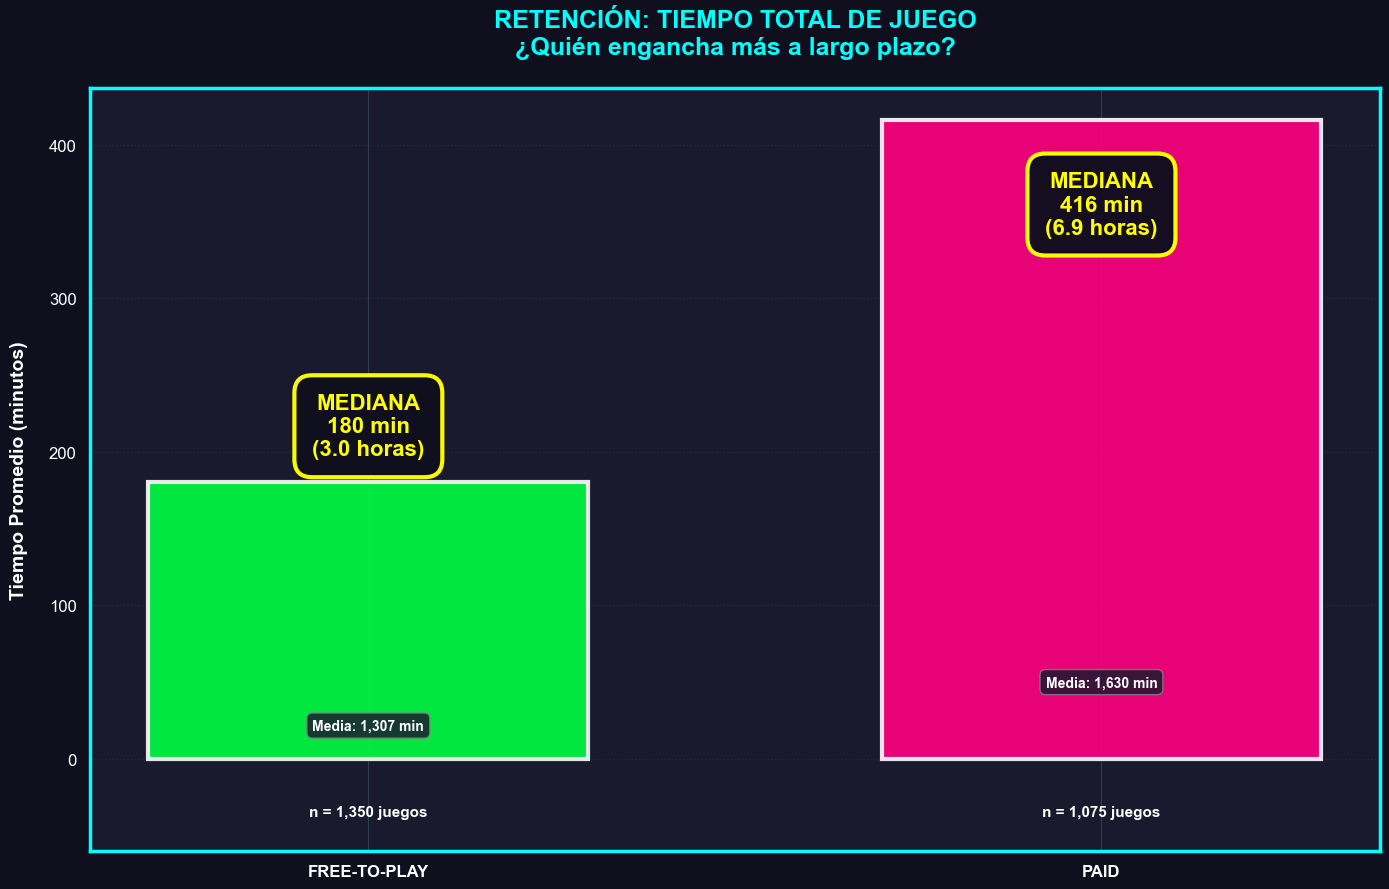

In [5]:
# Estilo gaming 
plt.style.use('dark_background') 
sns.set_style("darkgrid", { 
    "axes.facecolor": "#1a1a2e", 
    "figure.facecolor": "#0f0f1e", 
    "grid.color": "#2d3e50", 
    "grid.alpha": 0.3 
}) 
COLOR_F2P = '#00ff41' 
COLOR_PAID = '#ff0080' 
COLOR_TEXT = '#00ffff' 

# Preparamos los datos 
df_retention = df_total[ 
    (df_total['is_free'].notna()) & 
    (df_total['average_forever'].notna()) & 
    (df_total['average_forever'] > 0) & 
    (df_total['owners_median'] > 100) 
].copy() 

df_retention['model'] = df_retention['is_free'].map({True: 'F2P', False: 'PAID'}) 

# Calcular estadísticas 
stats_data = df_retention.groupby('model')['average_forever'].agg([ 
    'median', 'mean', 'count' 
]).reset_index() 

# Test estadístico 
t_stat, p_value = stats.ttest_ind( 
    df_retention[df_retention['is_free'] == True]['average_forever'], 
    df_retention[df_retention['is_free'] == False]['average_forever'] 
) 

print(f"\n TEST ESTADÍSTICO:")
print(f"   T-statistic: {t_stat:.2f}")
print(f"   P-value: {p_value:.6f}")
if p_value < 0.001:
    print("  Diferencia ALTAMENTE significativa (p < 0.001)")

# Calcular diferencia porcentual
f2p_median = stats_data[stats_data['model'] == 'F2P']['median'].values[0]
paid_median = stats_data[stats_data['model'] == 'PAID']['median'].values[0]
diff_pct = ((paid_median - f2p_median) / f2p_median) * 100

print(f"\n DIFERENCIA:")
print(f" PAID retiene {diff_pct:+.0f}% más tiempo que F2P")
print(f" ({int(paid_median)} min vs {int(f2p_median)} min)")

# Gráfico 
fig, ax = plt.subplots(figsize=(14, 9))

models = stats_data['model'] 
medians = stats_data['median'] 
means = stats_data['mean'] 
x = np.arange(len(models)) 
width = 0.6 

# Barras principales (mediana) 
bars = ax.bar(x, medians, width,  
              color=[COLOR_F2P, COLOR_PAID], 
              edgecolor='white', linewidth=3, alpha=0.9) 

# Añadir valores encima 
for i, (bar, median, mean, count) in enumerate(zip(bars, medians, means, stats_data['count'])): 
    height = bar.get_height()
    
    # Posición del texto principal
    if i == 1:  # Barra PAID (alta)
        y_pos = height * 0.92
        va_align = 'top'
    else:  # Barra F2P (baja)
        y_pos = height + 15
        va_align = 'bottom'
    
    # RECUADRO AMARILLO: MEDIANA (más grande y destacado)
    ax.text(bar.get_x() + bar.get_width()/2., y_pos,
           f'MEDIANA\n{int(median):,} min\n({median/60:.1f} horas)',
           ha='center', va=va_align, fontsize=16,
           color='yellow', fontweight='bold',
           bbox=dict(boxstyle='round,pad=0.8', facecolor='#0f0f1e',
                    edgecolor='yellow', linewidth=3, alpha=0.98),
           zorder=5)
    
    # Media (texto secundario, más pequeño)
    ax.text(bar.get_x() + bar.get_width()/2., height * 0.12,
           f'Media: {int(mean):,} min',
           ha='center', va='center', fontsize=10,
           color='white', fontweight='bold',
           bbox=dict(boxstyle='round,pad=0.4', facecolor='#1a1a2e', 
                    edgecolor='gray', linewidth=1, alpha=0.85),
           zorder=3)
    
    # Número de juegos
    ax.text(bar.get_x() + bar.get_width()/2., -30,
           f'n = {int(count):,} juegos',
           ha='center', va='top', fontsize=11,
           color='white', fontweight='bold')

# Títulos y labels 
ax.set_title('RETENCIÓN: TIEMPO TOTAL DE JUEGO\n' + 
            '¿Quién engancha más a largo plazo?', 
            fontsize=18, fontweight='bold', color=COLOR_TEXT, pad=25) 

ax.set_ylabel('Tiempo Promedio (minutos)', fontsize=14,  
             fontweight='bold', color='white', labelpad=15) 

ax.set_xticks(x) 
ax.set_xticklabels(['FREE-TO-PLAY', 'PAID'],  
                   fontsize=17, fontweight='bold', color='white') 

ax.tick_params(colors='white', labelsize=12, width=2, length=6) 

# Grid
ax.grid(True, axis='y', alpha=0.4, linestyle=':', linewidth=1, color='#2d3e50') 

# Spines 
for spine in ax.spines.values(): 
    spine.set_edgecolor(COLOR_TEXT) 
    spine.set_linewidth(2.5) 

# Ajustar límites
ax.set_ylim(-60, max(medians) * 1.05)

plt.tight_layout() 
plt.show();

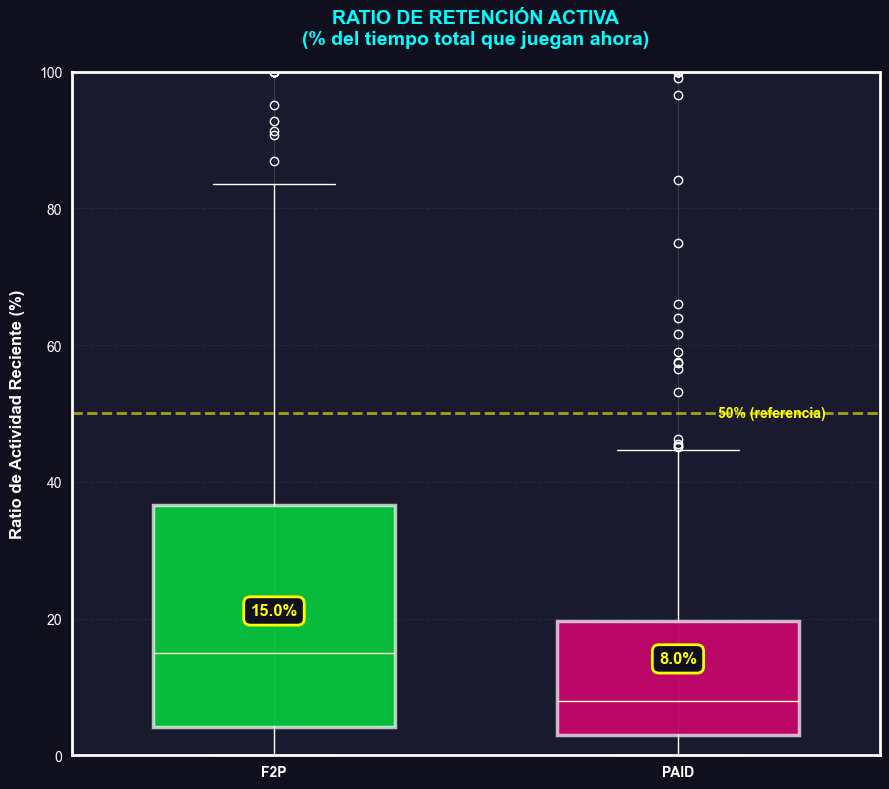

In [6]:
# Estilo gaming
plt.style.use('dark_background')
sns.set_style("darkgrid", {
    "axes.facecolor": "#1a1a2e",
    "figure.facecolor": "#0f0f1e",
    "grid.color": "#2d3e50",
    "grid.alpha": 0.3
})
COLOR_F2P = '#00ff41'
COLOR_PAID = '#ff0080'
COLOR_TEXT = '#00ffff'
# Preparacion de datos
# Filtrar datos válidos
df_retention = df_total[
    (df_total['is_free'].notna()) &
    (df_total['average_forever'].notna()) &
    (df_total['average_forever'] > 0) &
    (df_total['owners_median'] > 100)
].copy()
df_retention['model'] = df_retention['is_free'].map({True: 'F2P', False: 'PAID'})
# Filtrar juegos con datos de 2 weeks
df_active = df_retention[
    (df_retention['average_2weeks'].notna()) &
    (df_retention['average_2weeks'] > 0)
].copy()
# Calcular ratio de actividad reciente
df_active['retention_ratio'] = (df_active['average_2weeks'] / df_active['average_forever']) * 100
df_active['retention_ratio'] = df_active['retention_ratio'].clip(0, 100)
# GRÁFICO CON 2 SUBPLOTS
fig, ax = plt.subplots(figsize=(9, 8))
# SUBPLOT 2: Ratio de retención
retention_stats = df_active.groupby('model')['retention_ratio'].agg([
    'mean', 'median', 'std'
]).round(2)
bp2 = ax.boxplot(
    [df_active[df_active['is_free'] == True]['retention_ratio'],
     df_active[df_active['is_free'] == False]['retention_ratio']],
    positions=[0, 1],
    widths=0.6,
    patch_artist=True,
    showfliers=True
)
for i, (patch, color) in enumerate(zip(bp2['boxes'], [COLOR_F2P, COLOR_PAID])):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
    patch.set_edgecolor('white')
    patch.set_linewidth(2.5)
# Añadir línea de referencia en 50%
ax.axhline(50, color='yellow', linestyle='--', linewidth=2, alpha=0.6)
ax.text(1.1, 50, '50% (referencia)', fontsize=10, color='yellow',
        fontweight='bold', va='center')
# Valores medianos
for i, (pos, model) in enumerate(zip([0, 1], ['F2P', 'PAID'])):
    median_val = retention_stats.loc[model, 'median']
    ax.text(pos, median_val + 5,
            f'{median_val:.1f}%',
            ha='center', va='bottom', fontsize=12,
            color='yellow', fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.4', facecolor='#0f0f1e',
                      edgecolor='yellow', linewidth=2))
ax.set_title('RATIO DE RETENCIÓN ACTIVA\n' +
             '(% del tiempo total que juegan ahora)',
             fontsize=14, fontweight='bold', color=COLOR_TEXT, pad=20)
ax.set_ylabel('Ratio de Actividad Reciente (%)', fontsize=12,
              fontweight='bold', color='white', labelpad=10)
ax.set_xticks([0, 1])
ax.set_xticklabels(['F2P', 'PAID'], fontsize=13, fontweight='bold')
ax.tick_params(colors='white', labelsize=10)
ax.grid(True, axis='y', alpha=0.4, linestyle='--')
ax.set_ylim(0, 100)
for spine in ax.spines.values():
    spine.set_edgecolor('white')
    spine.set_linewidth(2)
plt.tight_layout()
plt.show();
